# Manifold Learning - The S Dataset - Morphed

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
    
### Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

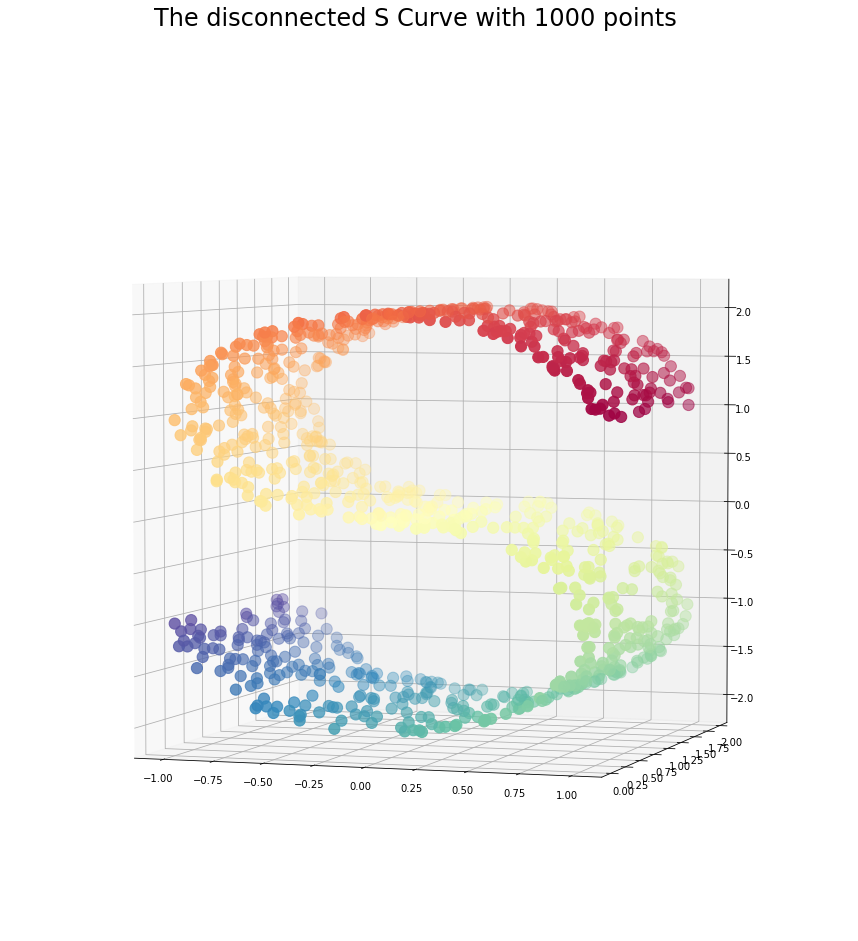

In [1]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

# We now introduce a slight modification to the S curve - we lift the upper part a bit up and cut the S into two parts
lift = 0.0
X[X[:,2]>=0,2] = X[X[:,2]>=0,2]-lift
# we make the y-axis a little bit broader
scale = 1
X[:, 1] = X[:, 1] * scale

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The disconnected S Curve with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)

# Last but not least: PCA

(-2.1711272715589613, 2.255593304212835, -1.140712295459944, 1.220002855154793)

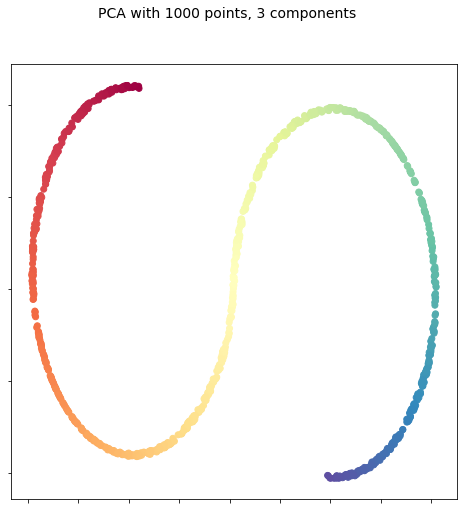

In [9]:
n_components = 3
from sklearn.decomposition import PCA
from matplotlib.ticker import NullFormatter

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

pca = PCA(n_components=n_components)
Y = pca.fit_transform(X)
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

In [7]:
pca.explained_variance_ratio_

array([0.68845888, 0.18278355, 0.12875756])

In [8]:
pca.components_

array([[ 0.06135036,  0.00949673, -0.99807111],
       [ 0.99807487, -0.00969322,  0.06125836],
       [-0.00909277, -0.99990792, -0.01007313]])

## Exercise

In the first code cell play with the parameters
* lift to move the upper part of the S and
* scale to make the y-axis broader

Can you get PCA to change the order of axes as principcal components?

If so, change your plot so that you can still see your S even in the remaining principal components